In [58]:
from pycaret.classification import *
import pandas as pd
import seaborn as sns

In [18]:
df_raw = pd.read_csv(r"T:\My Drive\geohack\dfcleaned_fortrain.csv")
df_raw = df_raw.drop(columns="Unnamed: 0")

df_raw.head()

,filename,well_name,DEPTH,GR,DT,RES,FORMATION
0,34_8-7_R_logs.las,34/8-7 R,368.4908,25.7907,0.0,0.5446,NORDLAND GP
1,34_8-7_R_logs.las,34/8-7 R,368.6432,25.9854,0.0,0.5492,NORDLAND GP
2,34_8-7_R_logs.las,34/8-7 R,368.7956,25.5390,0.0,0.5546,NORDLAND GP
3,34_8-7_R_logs.las,34/8-7 R,368.9480,25.7147,0.0,0.5612,NORDLAND GP
4,34_8-7_R_logs.las,34/8-7 R,369.1004,25.7887,0.0,0.5689,NORDLAND GP


In [19]:
import random

blind_wells = random.choices(df_raw.well_name.unique(), k=5)
blind_wells

['35/11-6', '35/8-6 S', '34/8-7 R', '35/4-1', '25/9-1']

In [ ]:
pl

In [20]:
df_raw_wells = df_raw[~df_raw.well_name.isin(blind_wells)]
df_blind_wells = df_raw[df_raw.well_name.isin(blind_wells)]

In [21]:
df = df_raw_wells[["GR", "DT", "RES", "FORMATION"]]

In [22]:
exp1 = setup(data=df, target="FORMATION", session_id=123)

,Description,Value
0,session_id,123
1,Target,FORMATION
2,Target Type,Multiclass
3,Label Encoded,"BAAT GP: 0, BOKNFJORD GP: 1, CROMER KNOLL GP: 2, DUNLIN GP: 3, HEGRE GP: 4, HORDALAND GP: 5, NORDLAND GP: 6, ROGALAND GP: 7, ROTLIEGENDES GP: 8, SHETLAND GP: 9, TYNE GP: 10, VESTLAND GP: 11, VIKING GP: 12, ZECHSTEIN GP: 13"
4,Original Data,"(1523932, 4)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:


best = compare_models(include=['lightgbm', 'knn', 'et'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6520,0.8932,0.4297,0.6340,0.6307,0.5728,0.5762,33.6610
knn,K Neighbors Classifier,0.6365,0.8763,0.4513,0.6230,0.6250,0.5569,0.5584,2.4610
et,Extra Trees Classifier,0.2747,0.3748,0.1936,0.2682,0.2679,0.2465,0.2475,15.3170


In [26]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6278,0.8530,0.4350,0.6216,0.6133,0.5450,0.5479
1,0.6625,0.9151,0.4255,0.6449,0.6395,0.5849,0.5888
2,0.6550,0.9018,0.4080,0.6360,0.6331,0.5763,0.5796
3,0.6520,0.8921,0.4377,0.6293,0.6292,0.5726,0.5761
4,0.6516,0.8927,0.4385,0.6318,0.6297,0.5725,0.5757
5,0.6541,0.9009,0.3783,0.6330,0.6316,0.5747,0.5782
6,0.6448,0.8751,0.4387,0.6245,0.6228,0.5641,0.5673
7,0.6559,0.8978,0.4492,0.6383,0.6354,0.5778,0.5809
8,0.6713,0.9258,0.4477,0.6567,0.6481,0.5956,0.5996


In [29]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6708,0.9347,0.4397,0.6603,0.6418,0.5923,0.5984
1,0.6698,0.9345,0.4471,0.6575,0.6418,0.5915,0.5973
2,0.6696,0.9342,0.4373,0.6556,0.6403,0.5909,0.5969
3,0.6697,0.9350,0.4401,0.6558,0.6405,0.5911,0.5970
4,0.6705,0.9349,0.4480,0.6582,0.6420,0.5921,0.5981
5,0.6696,0.9345,0.4389,0.6577,0.6409,0.5910,0.5970
6,0.6675,0.9340,0.4428,0.6560,0.6391,0.5883,0.5944
7,0.6713,0.9352,0.4485,0.6611,0.6426,0.5931,0.5991
8,0.6714,0.9350,0.4422,0.6614,0.6425,0.5931,0.5992


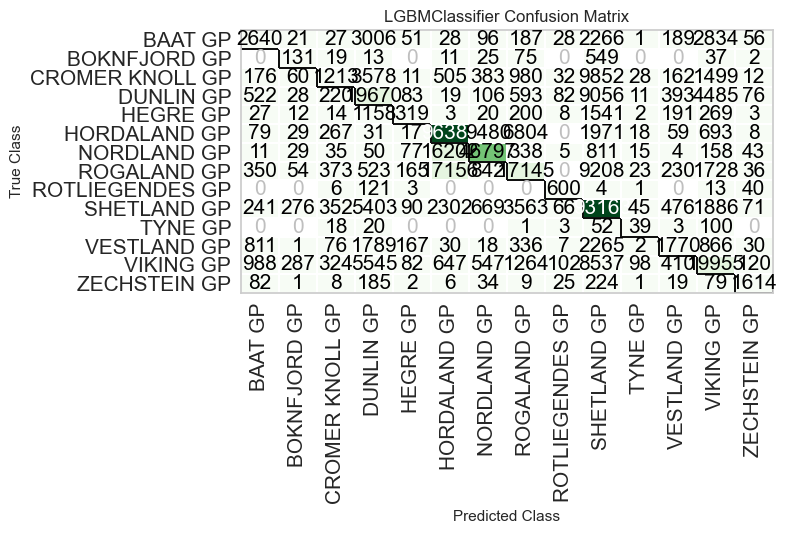

In [30]:
plot_model(lightgbm, plot = 'confusion_matrix')

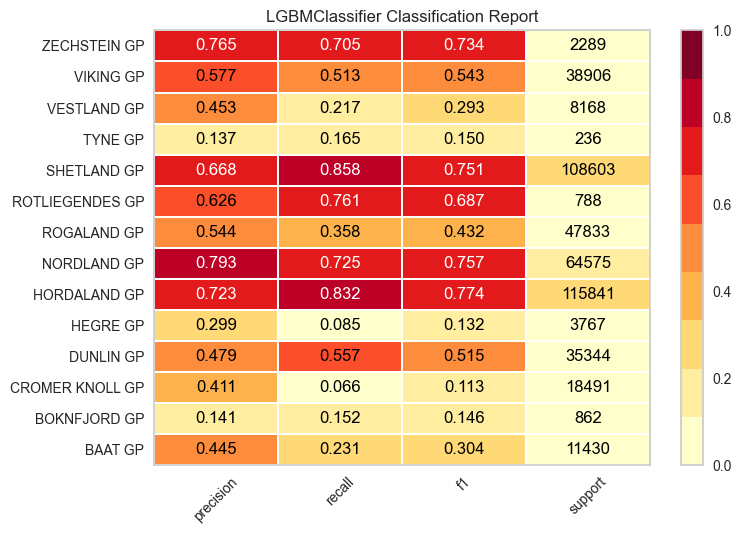

In [31]:
plot_model(lightgbm, plot = 'class_report')

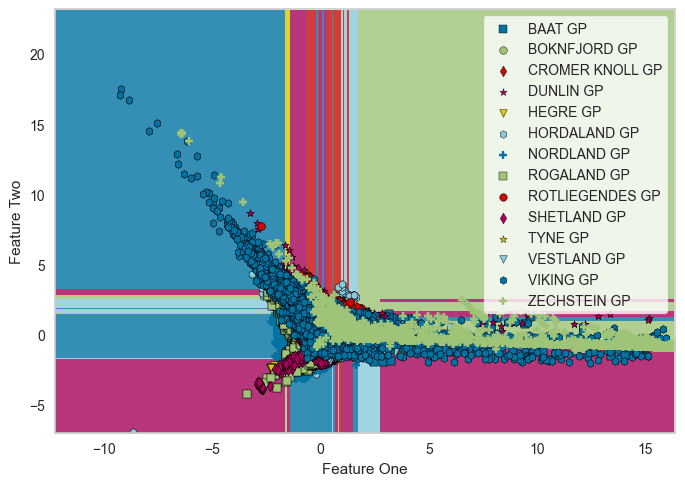

In [32]:
plot_model(lightgbm, plot='boundary')

In [33]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6699,0.9347,0.4428,0.6579,0.6409,0.5913,0.5974


,GR,DT,RES,FORMATION,Label,Score
0,44.400600,128.792892,0.6371,ROGALAND GP,ROGALAND GP,0.4231
1,104.527702,120.885002,1.1779,SHETLAND GP,SHETLAND GP,0.5708
2,90.000198,139.752594,3.0176,NORDLAND GP,NORDLAND GP,0.7805
3,89.730598,121.527603,1.5638,CROMER KNOLL GP,SHETLAND GP,0.3164
4,115.959801,94.615898,1.5268,SHETLAND GP,SHETLAND GP,0.4922
...,...,...,...,...,...,...
457128,21.905899,141.274902,1.0651,HORDALAND GP,NORDLAND GP,0.4799
457129,100.184898,141.485992,1.4260,HORDALAND GP,HORDALAND GP,0.5541
457130,94.595596,80.901100,3.4814,CROMER KNOLL GP,DUNLIN GP,0.4639
457131,149.247299,87.448196,2.9532,CROMER KNOLL GP,CROMER KNOLL GP,0.2263


In [34]:
save_model(tuned_lightgbm, "tunde_model_lightgbm_261122")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='FORMATION',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.005,
                                 max_depth=-1, min_child_samples=96,
                                 min_child_weight

In [39]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [37]:
final_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [40]:
save_model(final_lightgbm, "final_model_lightgbm_271122_8am")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='FORMATION',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.005,
                                 max_depth=-1, min_child_samples=96,
                                 min_child_weight

In [42]:
df_blind_wells

,filename,well_name,DEPTH,GR,DT,RES,FORMATION
0,34_8-7_R_logs.las,34/8-7 R,368.4908,25.7907,0.0000,0.5446,NORDLAND GP
1,34_8-7_R_logs.las,34/8-7 R,368.6432,25.9854,0.0000,0.5492,NORDLAND GP
2,34_8-7_R_logs.las,34/8-7 R,368.7956,25.5390,0.0000,0.5546,NORDLAND GP
3,34_8-7_R_logs.las,34/8-7 R,368.9480,25.7147,0.0000,0.5612,NORDLAND GP
4,34_8-7_R_logs.las,34/8-7 R,369.1004,25.7887,0.0000,0.5689,NORDLAND GP
...,...,...,...,...,...,...,...
1277580,35_11-6_logs.las,35/11-6,3969.1052,40.3088,71.6453,4.8652,DUNLIN GP
1277581,35_11-6_logs.las,35/11-6,3969.2576,40.9273,71.5839,4.8431,DUNLIN GP
1277582,35_11-6_logs.las,35/11-6,3969.4099,41.3702,72.1132,4.9130,DUNLIN GP
1277583,35_11-6_logs.las,35/11-6,3969.5625,42.7849,72.4121,5.1019,DUNLIN GP


In [46]:
final_lightgbm.predict(df_blind_wells[["GR", "DT", "RES"]])

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

In [47]:
df_blind_wells["Predict"] = final_lightgbm.predict(df_blind_wells[["GR", "DT", "RES"]])

In [51]:
df_blind_wells

,filename,well_name,DEPTH,GR,DT,RES,FORMATION,Predict
0,34_8-7_R_logs.las,34/8-7 R,368.4908,25.7907,0.0000,0.5446,NORDLAND GP,9
1,34_8-7_R_logs.las,34/8-7 R,368.6432,25.9854,0.0000,0.5492,NORDLAND GP,9
2,34_8-7_R_logs.las,34/8-7 R,368.7956,25.5390,0.0000,0.5546,NORDLAND GP,9
3,34_8-7_R_logs.las,34/8-7 R,368.9480,25.7147,0.0000,0.5612,NORDLAND GP,9
4,34_8-7_R_logs.las,34/8-7 R,369.1004,25.7887,0.0000,0.5689,NORDLAND GP,9
...,...,...,...,...,...,...,...,...
1277580,35_11-6_logs.las,35/11-6,3969.1052,40.3088,71.6453,4.8652,DUNLIN GP,9
1277581,35_11-6_logs.las,35/11-6,3969.2576,40.9273,71.5839,4.8431,DUNLIN GP,9
1277582,35_11-6_logs.las,35/11-6,3969.4099,41.3702,72.1132,4.9130,DUNLIN GP,9
1277583,35_11-6_logs.las,35/11-6,3969.5625,42.7849,72.4121,5.1019,DUNLIN GP,9


In [52]:
pred = predict_model(final_lightgbm, df_blind_wells[["GR", "DT", "RES"]])
pred

,GR,DT,RES,Label,Score
0,25.7907,0.0000,0.5446,SHETLAND GP,0.5266
1,25.9854,0.0000,0.5492,SHETLAND GP,0.5266
2,25.5390,0.0000,0.5546,SHETLAND GP,0.5260
3,25.7147,0.0000,0.5612,SHETLAND GP,0.5265
4,25.7887,0.0000,0.5689,SHETLAND GP,0.5346
...,...,...,...,...,...
1277580,40.3088,71.6453,4.8652,SHETLAND GP,0.4353
1277581,40.9273,71.5839,4.8431,SHETLAND GP,0.4356
1277582,41.3702,72.1132,4.9130,SHETLAND GP,0.4315
1277583,42.7849,72.4121,5.1019,SHETLAND GP,0.4088


In [53]:
df_blind_wells['PRED'] = pred['Label']

In [54]:
df_blind_wells

,filename,well_name,DEPTH,GR,DT,RES,FORMATION,Predict,PRED
0,34_8-7_R_logs.las,34/8-7 R,368.4908,25.7907,0.0000,0.5446,NORDLAND GP,9,SHETLAND GP
1,34_8-7_R_logs.las,34/8-7 R,368.6432,25.9854,0.0000,0.5492,NORDLAND GP,9,SHETLAND GP
2,34_8-7_R_logs.las,34/8-7 R,368.7956,25.5390,0.0000,0.5546,NORDLAND GP,9,SHETLAND GP
3,34_8-7_R_logs.las,34/8-7 R,368.9480,25.7147,0.0000,0.5612,NORDLAND GP,9,SHETLAND GP
4,34_8-7_R_logs.las,34/8-7 R,369.1004,25.7887,0.0000,0.5689,NORDLAND GP,9,SHETLAND GP
...,...,...,...,...,...,...,...,...,...
1277580,35_11-6_logs.las,35/11-6,3969.1052,40.3088,71.6453,4.8652,DUNLIN GP,9,SHETLAND GP
1277581,35_11-6_logs.las,35/11-6,3969.2576,40.9273,71.5839,4.8431,DUNLIN GP,9,SHETLAND GP
1277582,35_11-6_logs.las,35/11-6,3969.4099,41.3702,72.1132,4.9130,DUNLIN GP,9,SHETLAND GP
1277583,35_11-6_logs.las,35/11-6,3969.5625,42.7849,72.4121,5.1019,DUNLIN GP,9,SHETLAND GP


In [55]:
from sklearn import metrics

In [56]:
accuracy = metrics.accuracy_score(df_blind_wells["FORMATION"], df_blind_wells["PRED"])

In [57]:
accuracy

0.592447026657553